# shaps

Claire & Coco  
December 11, 2024

# Set up environment

In [ ]:
study <- params$study
cv <- params$cv
algorithms <- params$algorithms
version <- params$version


In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
shaps_grp <- read_rds(file.path(path_models, str_c("inner_shapsgrp_", 
                                           version, "_", cv, ".rds"))) |>

  glimpse()


Rows: 1,294,679
Columns: 3
Groups: id_obs [11,562]
$ id_obs       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ variable_grp <fct> achieve, acquire, adj, adverb, affect, affiliation, all_p…
$ value        <dbl> 0.000000e+00, 0.000000e+00, -1.508398e-07, 0.000000e+00, …

In [ ]:
shaps <- shaps_grp |>
  group_by(variable_grp) |> 
  summarize(mean_value = (mean(abs(value)))) |> 
  mutate(group = reorder(variable_grp, mean_value)) |> 
  arrange(desc(mean_value))


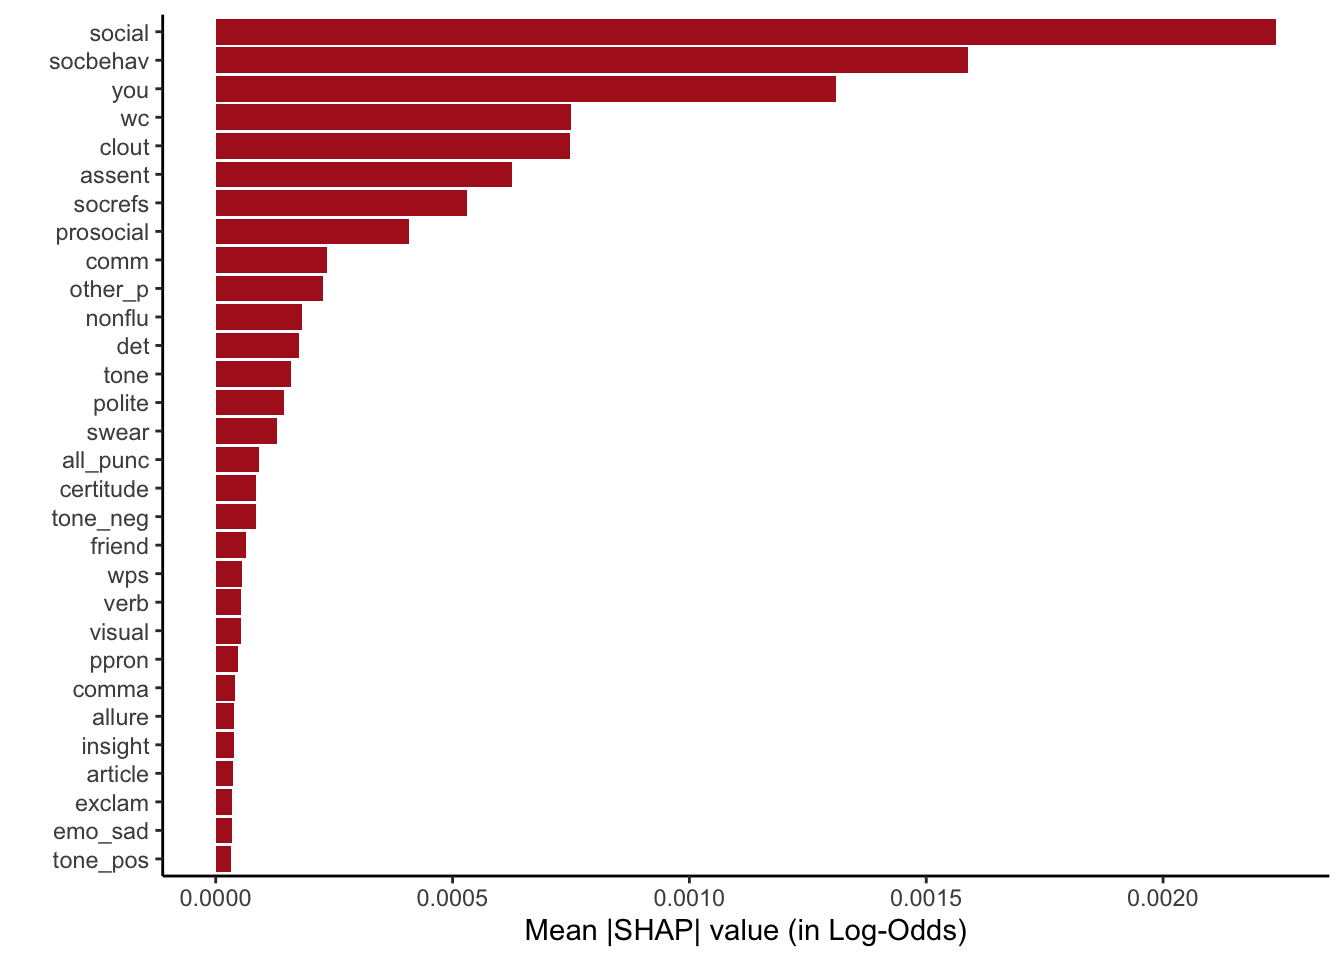

In [ ]:

shaps |>
  head(30) |> 
  ggplot() +
  geom_bar(aes(x = group, y = mean_value), stat = "identity", fill = "#af1f21") +
  ylab("Mean |SHAP| value (in Log-Odds)") +
  xlab("") +
  coord_flip()
